In [2]:
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
%matplotlib inline

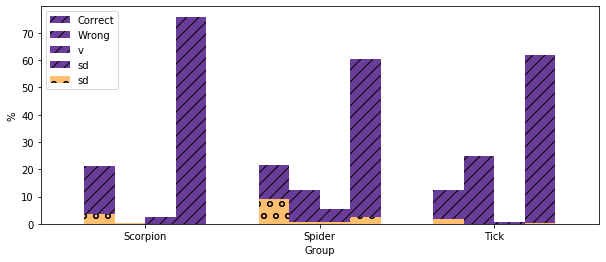

In [4]:
df = pd.DataFrame(columns=['Level', 'Group', 'Correct', 'Wrong'],
                  data=[[5, 'Scorpion', 75.94 , 0 ],
                        [4, 'Scorpion', 2.40 , 0 ],
                        [3, 'Scorpion', 0 , 0.34 ],
                        [2, 'Scorpion', 17.86 , 3.43 ],
                        [5, 'Spider', 57.91 , 2.44 ],
                        [4, 'Spider', 4.73 , 0.65 ],
                        [3, 'Spider', 11.74 , 0.81 ],
                        [2, 'Spider', 12.72 , 8.97 ],
                        [5, 'Tick', 61.82 , 0.26 ],
                        [4, 'Tick', 0.80 , 0 ],
                        [3, 'Tick', 24.73 , 0 ],
                        [2, 'Tick', 10.75 , 1.61 ] ])
                                                
df.set_index(['Level', 'Group'], inplace=True)
df0 = df.reorder_levels(['Group', 'Level']).sort_index()

patterns = [ "//" , "o" ] # "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
colors = plt.cm.Paired.colors
df0 = df0.unstack(level=-1) # unstack the 'Context' column
fig, ax = plt.subplots()
(df0['Correct']+df0['Wrong']).plot( kind='bar', color=[colors[9]], rot=0, 
                                   ax=ax, hatch=patterns[0], width=0.7)
(df0['Wrong']).plot(kind='bar', color=[colors[6]], rot=0, ax=ax, hatch=patterns[1], width=0.7)
#df0['Wrong'].plot(kind='bar', color=[colors[5]], rot=0, ax=ax)

#legend_labels = [f'{val}' for val in df0.columns]
legend_labels = ['Correct','Wrong','v','sd','sd']
ax.legend(legend_labels)
fig.set_figwidth(10)
fig.set_figheight(4)
ax.set_ylabel('%')

#labels = ['1   2   3   4', 'G2', 'G3', 'G4', 'G5']
#ax.set_xticklabels(labels)
#plt.tight_layout()
plt.show()
#fig.savefig('/Users/fernanda/Downloads/Frontiers_class_val2.jpeg', dpi=300)

Text(0.5, 68.09375, 'HMM profiles')

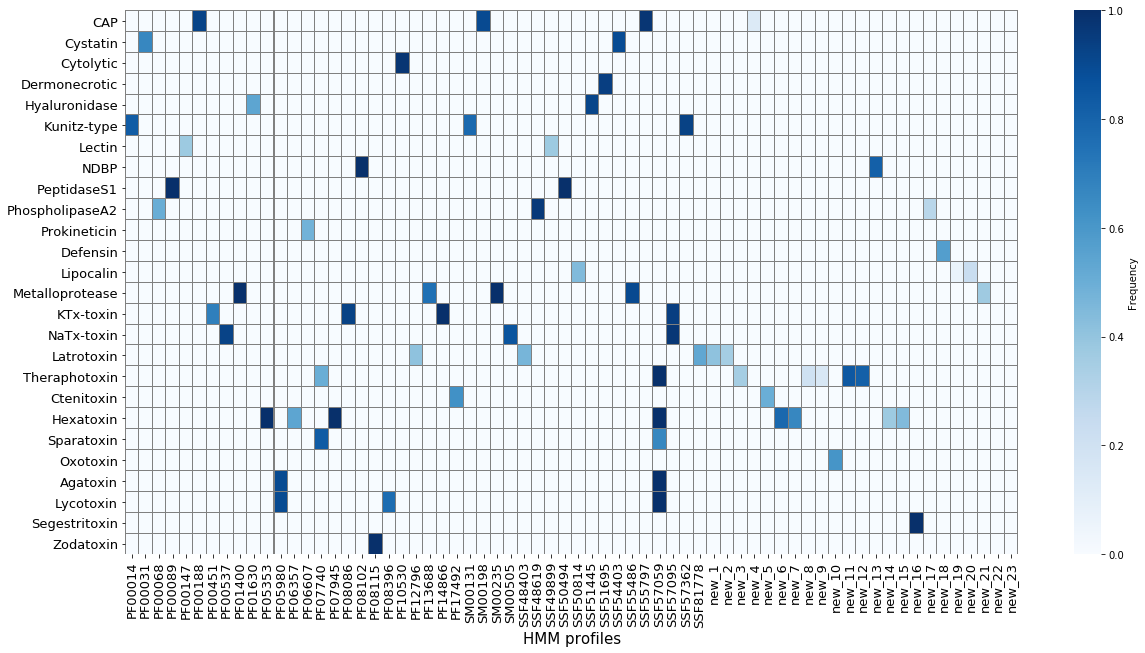

In [13]:
domains = pd.read_csv('domains.ven2021.edited.final.tsv', sep = '\t')
domains = domains.drop('Type', 1)
domains = domains.drop('Venom_Component', 1)
domains = domains.drop('SM00043', 1)
#domains = domains.iloc[0:20, :]

f = plt.figure()
#ax = plt.axes()
#f,(ax1) = plt.subplots(1)
f.set_figwidth(20)
f.set_figheight(10)
#plt.figure(figsize=(20,10))

#ax.hlines([3, 6, 9], *ax.get_xlim())
y_axis_labels = ['CAP','Cystatin','Cytolytic','Dermonecrotic','Hyaluronidase','Kunitz-type',
                 'Lectin','NDBP','PeptidaseS1','PhospholipaseA2','Prokineticin','Defensin',
                 'Lipocalin','Metalloprotease','KTx-toxin','NaTx-toxin','Latrotoxin', 
                 'Theraphotoxin','Ctenitoxin','Hexatoxin','Sparatoxin','Oxotoxin',
                 'Agatoxin','Lycotoxin','Segestritoxin','Zodatoxin']

ax = sns.heatmap(data=domains , vmin=0, vmax=1.0000, cmap = 'Blues',
                 xticklabels=True, yticklabels=y_axis_labels, linecolor='gray', 
                 linewidths=0.01,
                cbar_kws={'label': 'Frequency'} )
#mako, magma, greens, blues 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.tick_params(axis="y", labelsize=13)
ax.tick_params(axis="x", labelsize=13)
plt.xlabel('HMM profiles', fontsize=15)
#plt.ylabel('Venom Components', fontsize=15)
#plt.savefig('/Users/fernanda/Downloads/heatmap_frontiers_final.jpeg', dpi=300)